# Take a look at this blog post 

https://hackernoon.com/python-notebook-research-to-replicate-etf-using-free-data-ca9f88eb7349

In [13]:
%matplotlib inline

from bs4 import BeautifulSoup
import iexfinance
from iexfinance.stocks import Stock
import matplotlib
import matplotlib.pyplot as plt
import re
import requests
import numpy as np
import pandas as pd
'''
brew install phantomjs
or
brew tap homebrew/cask
brew cask install chromedriver
'''
# from selenium import webdriver
from selenium.webdriver.chrome.webdriver import WebDriver
import warnings

warnings.filterwarnings('ignore')

# Constituent data using browser automation

In [2]:
def get_table(soup):
    for t in soup.select('table'):
        header = t.select('thead tr th')
        if len(header) > 2:
            if (header[0].get_text().strip() == 'Symbol'
                and header[2].get_text().strip().startswith('% Holding')):
                return t
    raise Exception('could not find symbol list table')
    
# Scrapes ETF holdings from barchart.com
def get_etf_holdings(etf_symbol):
    '''
    etf_symbol: str
    
    return: pd.DataFrame
    '''
    url = 'https://www.barchart.com/stocks/quotes/{}/constituents?page=all'.format(
        etf_symbol)

    # Loads the ETF constituents page and reads the holdings table
    browser = WebDriver() # webdriver.PhantomJS()
    browser.get(url)
    html = browser.page_source
    soup = BeautifulSoup(html, 'html')
    table = get_table(soup)

    # Reads the holdings table line by line and appends each asset to a
    # dictionary along with the holdings percentage
    asset_dict = {}
    for row in table.select('tr')[1:-1]:
        try:
            cells = row.select('td')
            # print(row)
            symbol = cells[0].get_text().strip()
            # print(symbol)
            name = cells[1].text.strip()
            celltext = cells[2].get_text().strip()
            percent = float(celltext.rstrip('%'))
            shares = int(cells[3].text.strip().replace(',', ''))
            if symbol != "" and percent != 0.0:
                asset_dict[symbol] = {
                    'name': name,
                    'percent': percent,
                    'shares': shares,
                }
        except BaseException as ex:
            print(ex)
    browser.quit()
    return pd.DataFrame(asset_dict)

In [3]:
constituent = get_etf_holdings('SPY')

# Preview of data

In [4]:
constituent.T

name percent    shares
MSFT             Microsoft Corporation    4.22  84838616
AAPL                        Apple Inc.    3.59  49533880
AMZN                   Amazon.com Inc.     3.2   4562408
FB               Facebook Inc. Class A     1.8  26379040
BRK.B  Berkshire Hathaway Inc. Class B    1.66  21502112
JNJ                  Johnson & Johnson    1.55  29448832
JPM               JPMorgan Chase & Co.    1.49  36206156
GOOG             Alphabet Inc. Class C    1.39   3398911
GOOGL            Alphabet Inc. Class A    1.35   3310271
XOM            Exxon Mobil Corporation    1.31  46852140
V                    Visa Inc. Class A    1.23  19352820
PG            Procter & Gamble Company    1.16  27661644
BAC               Bank of America Corp    1.05  99330056
DIS                Walt Disney Company    1.04  19473496
CSCO                Cisco Systems Inc.       1  48677024
VZ         Verizon Communications Inc.       1  45691452
PFE                        Pfizer Inc.    0.99  61391470
T                            AT&T Inc.    0.98  80552430
UNH    UnitedHealth Group Incorporated    0.98  10610303
MA     Mastercard Incorporated Class A    0.98   9990110
HD                     Home Depot Inc.    0.97  12490755
CVX                Chevron Corporation    0.95  21011088
MRK                   Merck & Co. Inc.    0.89  28542956
INTC                 Intel Corporation    0.86  49727588
KO                   Coca-Cola Company    0.82  42494770
CMCSA      Comcast Corporation Class A    0.79  49897624
WFC              Wells Fargo & Company    0.78  45276652
PEP                       PepsiCo Inc.    0.77  15532677
BA                      Boeing Company    0.76   5810203
C                       Citigroup Inc.    0.66  26003542
...                                ...     ...       ...
COTY                 Coty Inc. Class A    0.03   4900336
PBCT    People's United Financial Inc.    0.02   4062571
PNR                        Pentair plc    0.02   1792005
HRB                     H&R Block Inc.    0.02   2224097
NKTR               Nektar Therapeutics    0.02   1884040
HOG               Harley-Davidson Inc.    0.02   1816223
NWL                  Newell Brands Inc    0.02   4292360
FOX            Fox Corporation Class B    0.02   1774906
XEC                 Cimarex Energy Co.    0.02   1120593
AIZ                      Assurant Inc.    0.02    573990
ROL                       Rollins Inc.    0.02   1612576
PWR               Quanta Services Inc.    0.02   1605477
PRGO                   Perrigo Co. Plc    0.02   1372242
HP              Helmerich & Payne Inc.    0.02   1181822
CPRI            Capri Holdings Limited    0.02   1687792
LB                       L Brands Inc.    0.02   2491231
FL                    Foot Locker Inc.    0.02   1274745
UAA          Under Armour Inc. Class A    0.02   2018840
LEG       Leggett & Platt Incorporated    0.02   1436029
JEF     Jefferies Financial Group Inc.    0.02   2904206
IPGP         IPG Photonics Corporation    0.02    392977
AMG     Affiliated Managers Group Inc.    0.02    583311
TRIP                  TripAdvisor Inc.    0.02   1116139
NWSA          News Corporation Class A    0.02   4160984
DISCA           Discovery Inc. Class A    0.02   1694087
UA           Under Armour Inc. Class C    0.02   2043630
GPS                           Gap Inc.    0.02   2390891
JWN                     Nordstrom Inc.    0.02   1250983
MAC                   Macerich Company    0.02   1169000
NWS           News Corporation Class B    0.01   1244296

[505 rows x 3 columns]

In [5]:
df_dia_members = get_etf_holdings('DIA')
df_dia_members.T

name percent   shares
BA                                 Boeing Company    9.01  5386034
UNH               UnitedHealth Group Incorporated    6.37  5386034
HD                                Home Depot Inc.    5.34  5386034
MCD                        McDonald's Corporation    5.33  5386034
AAPL                                   Apple Inc.       5  5386034
GS                       Goldman Sachs Group Inc.    4.98  5386034
V                               Visa Inc. Class A    4.41  5386034
MMM                                    3M Company    4.33  5386034
TRV                      Travelers Companies Inc.     3.9  5386034
DIS                           Walt Disney Company    3.68  5386034
JNJ                             Johnson & Johnson    3.64  5386034
IBM   International Business Machines Corporation    3.51  5386034
MSFT                        Microsoft Corporation    3.44  5386034
CAT                              Caterpillar Inc.     3.3  5386034
UTX               United Technologies Corporation    3.25  5386034
AXP                      American Express Company    3.17  5386034
CVX                           Chevron Corporation    3.14  5386034
PG                       Procter & Gamble Company    2.89  5386034
JPM                          JPMorgan Chase & Co.    2.85  5386034
WMT                                  Walmart Inc.    2.83  5386034
NKE                             NIKE Inc. Class B    2.17  5386034
MRK                              Merck & Co. Inc.    2.15  5386034
XOM                       Exxon Mobil Corporation    1.93  5386034
VZ                    Verizon Communications Inc.    1.51  5386034
CSCO                           Cisco Systems Inc.    1.42  5386034
WBA                  Walgreens Boots Alliance Inc    1.37  5386034
KO                              Coca-Cola Company    1.33  5386034
DOW                                      Dow Inc.    1.33  5386034
INTC                            Intel Corporation     1.2  5386034
PFE                                   Pfizer Inc.    1.11  5386034

# IEX price data

In [14]:
def iex_charts(symbols):
    partlen = 99
    result = {}
    for i in range(0, len(symbols), partlen):
        charts = Stock(symbols[i:i+partlen]).get_chart(range='1m')
        if type(charts) == list:
            charts = {symbols[i]: charts}
        for symbol, data in charts.items():
            df = pd.DataFrame(data)
            df.date = pd.to_datetime(df.date)
            df.set_index('date', inplace=True)
            df.index.names = ['epoch']
            df.index = df.index.tz_localize('America/New_York')
            result[symbol] = df
    return result

def get_closes(constituents):
    symbols = list(constituents.columns)
    charts = iex_charts(symbols)
    return pd.DataFrame({symbol: df.close for symbol, df in charts.items()})    

In [15]:
def simulate(etf_symbol, cash, weights):
    # weights = get_etf_holdings(etf_symbol)
    symbols = list(weights.keys())
    charts = iex_charts(symbols)
    initial_prices = pd.Series({symbol: df.open[0] for symbol, df in charts.items()})
    last_prices = pd.Series({symbol: df.close[-1] for symbol, df in charts.items()})

    
    # construct portfolio
    portfolio = pd.DataFrame({
        'weight': weights,
        'initial_price': initial_prices,
        'last_price': last_prices,
    })
    portfolio.fillna(0)
    portfolio['shares'] = cash * portfolio.weight / 100 // portfolio.initial_price
    # calculate return for each symbol
    portfolio['return'] = (portfolio.last_price - portfolio.initial_price) * portfolio.shares
    
    return portfolio

# Putting together, replicate SPY itself

In [16]:
closes = get_closes(constituent)

In [17]:
replicated_perf = (
    ((closes - closes.iloc[0]) * constituent.loc['shares']).sum(axis=1) / 
    (closes.iloc[0] * constituent.loc['shares']).sum()
)

In [18]:
etf = iex_charts(['SPY'])['SPY']
original_perf = (etf.close - etf.close[0]) / etf.close[0]

In [19]:
performance = pd.DataFrame({'replicated': replicated_perf, 'original': original_perf})

<Figure size 864x576 with 0 Axes>

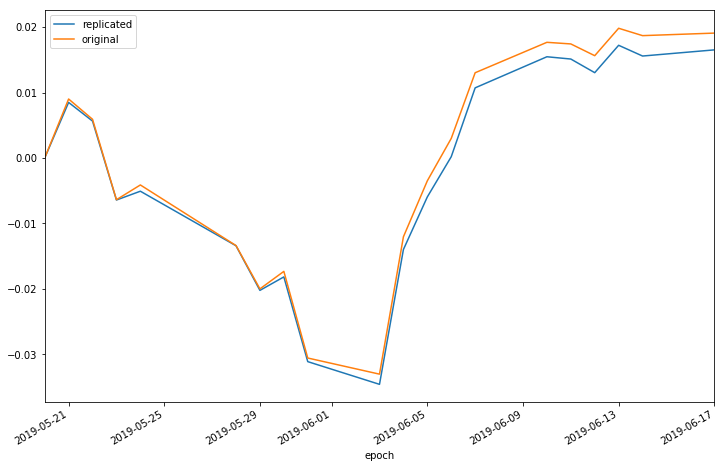

In [20]:
plt.figure(figsize=(12, 8))
performance.plot(figsize=(12, 8))

# What if I have only 10K?

In [21]:
# This is to recalculate the weights at day 1 (instead of using the latest weights that are affected by the price changes)
mktvals = (closes.iloc[0] * constituent.loc['shares'])
weights = mktvals / mktvals.sum()

In [22]:
# Say I have $10K, how many shares would I have bought for each?
cash = 1e+4
new_shares = cash * weights // closes.iloc[0]
positions = pd.DataFrame({
    'shares': new_shares,
    'price': closes.iloc[0],
    'dollar': closes.iloc[0] * new_shares,
}).loc[new_shares > 0]
positions

shares   price  dollar
MSFT       3  126.22  378.66
AAPL       1  183.09  183.09
FB         1  182.72  182.72
JNJ        1  138.42  138.42
JPM        1  111.35  111.35
XOM        1   75.90    75.9
PG         1  107.33  107.33
BAC        3   28.40    85.2
CSCO       1   56.01   56.01
VZ         1   59.01   59.01
PFE        2   41.59   83.18
T          3   32.19   96.57
MRK        1   78.88   78.88
INTC       1   43.56   43.56
KO         1   48.85   48.85
CMCSA      1   42.78   42.78
WFC        1   45.45   45.45
ORCL       1   53.66   53.66
GE         3    9.88   29.64
F          1   10.28   10.28

In [23]:
positions.dollar.sum()

1910.5400000000002

In [24]:
new_perf = ((closes - closes.iloc[0]) * new_shares).sum(axis=1) / (closes.iloc[0] * new_shares).sum()

In [25]:
new_result = pd.DataFrame({
    'replicated': new_perf,
    'original': original_perf,
})

In [26]:
new_result

replicated  original
epoch                                          
2019-05-20 00:00:00-04:00    0.000000  0.000000
2019-05-21 00:00:00-04:00    0.006899  0.009016
2019-05-22 00:00:00-04:00    0.006051  0.005917
2019-05-23 00:00:00-04:00   -0.005543 -0.006374
2019-05-24 00:00:00-04:00   -0.004376 -0.004120
2019-05-28 00:00:00-04:00   -0.010631 -0.013383
2019-05-29 00:00:00-04:00   -0.019555 -0.020004
2019-05-30 00:00:00-04:00   -0.017791 -0.017327
2019-05-31 00:00:00-04:00   -0.036126 -0.030569
2019-06-03 00:00:00-04:00   -0.045568 -0.033034
2019-06-04 00:00:00-04:00   -0.023648 -0.012044
2019-06-05 00:00:00-04:00   -0.014069 -0.003487
2019-06-06 00:00:00-04:00   -0.005067  0.002993
2019-06-07 00:00:00-04:00    0.009076  0.013030
2019-06-10 00:00:00-04:00    0.014949  0.017679
2019-06-11 00:00:00-04:00    0.019125  0.017433
2019-06-12 00:00:00-04:00    0.015666  0.015637
2019-06-13 00:00:00-04:00    0.018790  0.019827
2019-06-14 00:00:00-04:00    0.019989  0.018700
2019-06-17 00:00:00-04:00    0.024386  0.019088

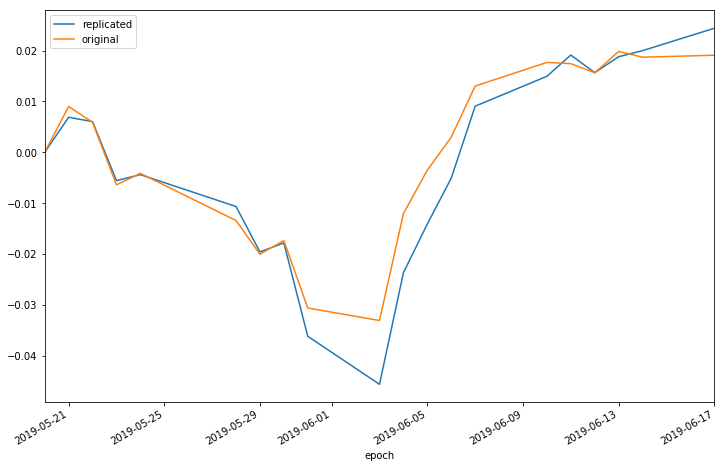

In [27]:
new_result.plot(figsize=(12, 8))